<a href="https://colab.research.google.com/github/pumazzo/esame_settembre/blob/main/MetodiAI_Fis2024_ProvaPratica_3_9_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Pratica - Metodi AI e Machine Learning per la fisica
### 3.9.2024 - AA 2023/24 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 2.5h

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano. L'esecuzione della cella scarica anche i dataset da utilizzare durante la prova;
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito*.
*   una volta completato il compito caricare il notebook nel apposito folder sul sito e-learning del corso disponibile al link: <p>
[consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=651690)<p>

**NOTA 1:** per scaricare localmente il notebook da colab: menù **File->Dowload->Download .ipynb** (non è necessario cambiare il nome del file, il form e-learning associa automaticamnte un folder con il vostro nome e id al file che caricate)
<p>

**NOTA 2:** una volta caricato e sottomesso il notebook non sono più possibili ulteriori modifiche.

In [ ]:
#@ Dati Personali
import os

Nome = 'Nome'  #@param {type: "string"}
Cognome = 'Cognome' #@param {type: "string"}
NumeroMatricola = 12345678 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  #https://drive.google.com/file/d/1Cp44LnK5ZMM8m0ANAqKl4UXMitw51eha/view?usp=drive_link
  print('Download datasets ...')
  !wget http://giagu.web.cern.ch/giagu/CERN/esame_settembre.npz
  !ls
  print('Done')

Download datasets ...
--2024-09-02 14:39:06--  http://giagu.web.cern.ch/giagu/CERN/esame_settembre.npz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.5.88, 188.185.18.46, 137.138.124.182, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.5.88|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/esame_settembre.npz [following]
--2024-09-02 14:39:06--  https://giagu.web.cern.ch/giagu/CERN/esame_settembre.npz
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.5.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114436812 (109M)
Saving to: ‘esame_settembre.npz’

esame_settembre.npz 100%[===================>] 109.13M   113MB/s    in 1.0s    

2024-09-02 14:39:07 (113 MB/s) - ‘esame_settembre.npz’ saved [114436812/114436812]

esame_settembre.npz  sample_data
Done


# Descrizione del compito:

Svolgere il seguente problema.


---



**Problema**
Riconoscimento di emozioni dai volti umani tramite immagine o posizione delle strutture facciali (landmarks).

Viene fornito il dataset in formato numpy compresso: *dataset_settembre.npz*, contenente due array numpy: dataset_train formato da 2591 esempi di fotografie di volti umani e le posizioni di 468 landarks facciali relative a quell'immagine. Ad ogni foto e set di landmarks è associata una label testuale che può essere "happy", "sad" o "surprise". Il secondo array dataset_test è di uguale struttura ed è formato da 3 esempi.
Ogni elemento dell'array è un dizionario. Per accedere rispettivamente all'immagine, alle coordinate dei landmarks e alle labels si usano le chiavi "image", "landmarks" e "label".

Per leggere il dataset utilizzare l'esempio di codice:

```
import numpy as np
with np.load("/esame_settembre.npz",allow_pickle=True) as DATA:
  data_train = DATA["data_train"]
  data_test = DATA["data_test"]
```
A titolo di esempio si fornisce il codice per plottare un elemento del dataset.
```
print("data len : ",len(data_train))
image = data_test[1]["image"]
landmark_array = data_test[1]["landmarks"]
plt.figure(figsize=(5,5))
plt.imshow(image,cmap="gist_gray")
plt.title(data_test[1]["label"])
plt.scatter(landmark_array[:, 0]*image.shape[0], landmark_array[:, 1]*image.shape[0],s=3,color="r")
plt.xticks([])
plt.yticks([])
```
![](https://github.com/pumazzo/esame_settembre/blob/main/esempio_esame.png?raw=true)

1. (A1): Addestrare una semplice rete convolutiva (CNN) per classificare le immagini del dataset. Plottare l'andamento della loss di train in funzione delle epoche;

2. (A2): Riportare, come si ritiene più opportuno, le performance della rete su un dataset di validazione composto dal 15% degli elementi di dataset_train che non sono stati usati per addestrare. Plottare le immagini di dataset_test e mostrare la label predetta dalla rete;

3. (A3): Addestrare un classificatore Random Forest (RF) per classificare gli elementi del dataset a partire dalla posizione dei landmarks. Ogni landmark è definito dalle sue cordinate i.e. la shape sarà [N,2]. Fare un reshape adequato di questo array.

4. (A4): Riportare, come si ritiene più opportuno, le performance del RF su un dataset di validazione composto dal 15% degli elementi di dataset_train che non sono stati usati per addestrare. Plottare le immagini di dataset_test e mostrare la label predetta da RF;


5. (A5): Produrre il seguente grafico. Plottare la posizione media di ognuno dei landmarks del dataset (usare plt.scatter, fare la media della posizione su tutti gli elementi del dataset). Colorare ogni landmark con l'importanza della feature corrispondente nel classificatore RF.
Per la feature importance si può usare
rf_classifier.feature_importances_
Se si sono usate entrambe le coordinate per identificare un landmark, considerare l'importanza del landmark come la somma dell'importanza delle due coordinate.
Hint: Si dovrebbe osservare che i landmark più rilevanti per la classificazione sono quelli che codificano la posizione degli angoli della bocca.

* commentare opportunamente i risultati ottenuti in ogni punto.
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with np.load("/content/esame_settembre.npz",allow_pickle=True) as DATA:
  data_train = DATA["data_train"]
  data_test = DATA["data_test"]

data len :  2591


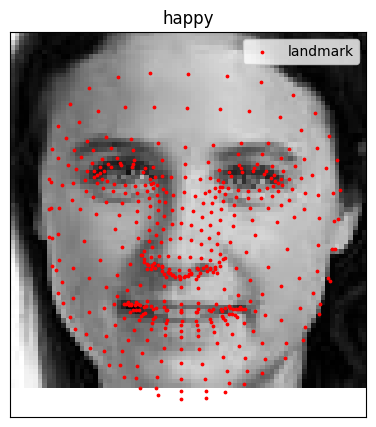

In [ ]:
print("data len : ",len(data_train))
image = data_test[1]["image"]
landmark_array = data_test[1]["landmarks"]
plt.figure(figsize=(5,5))
plt.imshow(image,cmap="gist_gray")
plt.title(data_test[1]["label"])
plt.scatter(landmark_array[:, 0]*image.shape[0], landmark_array[:, 1]*image.shape[0],s=3,color="r",label="landmark")
plt.xticks([])
plt.yticks([])
plt.legend()